In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
X = np.loadtxt(open("face_data.csv", "rb"), delimiter=",", skiprows=1)
data = X[:,0:4096]
labels = X[:, 4096]

Plotting one image for each person.

In [103]:
def plot(data):
    f, axarr = plt.subplots(7,7, figsize=(15,15))
    num_of_persons = int(data.shape[0]/10)
    for i in range(num_of_persons):
        row = int(i/7)
        column = int(i % 7)
        axarr[row,column].imshow(data[i*10].reshape((64,-1)))
    plt.show()

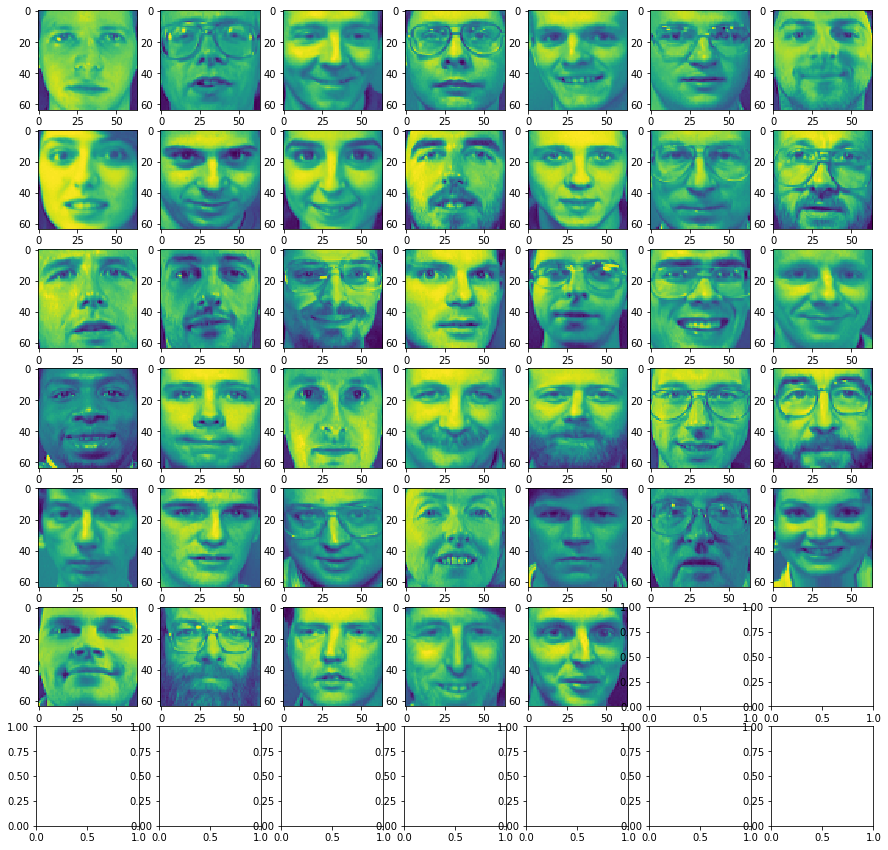

In [48]:
f, axarr = plt.subplots(7,7, figsize=(15,15))
num_of_persons = int(data.shape[0]/10)
for i in range(num_of_persons):
    row = int(i/7)
    column = int(i % 7)
    axarr[row,column].imshow(data[i*10].reshape((64,-1)))
plt.show()

In [168]:
# Making mean zero and unit variance for the matrix
mean_data = data - (data.sum(axis=0)/data.shape[0])
variance = np.square(mean_data)
variance = variance.sum(axis=0)
variance /=data.shape[0]
variance = np.sqrt(variance)
covariance = mean_data/variance
# covariance = np.transpose(covariance).dot(covariance)
covariance = covariance.T.dot(covariance)
covariance /= data.shape[0]
covariance

array([[ 1.        ,  0.9432174 ,  0.81486848, ..., -0.18530692,
        -0.18118209, -0.14321256],
       [ 0.9432174 ,  1.        ,  0.92443031, ..., -0.2513405 ,
        -0.24345313, -0.19747634],
       [ 0.81486848,  0.92443031,  1.        , ..., -0.3332097 ,
        -0.3170726 , -0.26976897],
       ...,
       [-0.18530692, -0.2513405 , -0.3332097 , ...,  1.        ,
         0.91151486,  0.82629682],
       [-0.18118209, -0.24345313, -0.3170726 , ...,  0.91151486,
         1.        ,  0.9439202 ],
       [-0.14321256, -0.19747634, -0.26976897, ...,  0.82629682,
         0.9439202 ,  1.        ]])

    Eigen Vector Decomposition.

In [170]:
ev , eig = np.linalg.eigh(covariance)
ev

array([-1.53861774e-13, -1.35634476e-13, -1.20805170e-13, ...,
        3.21183971e+02,  5.05543736e+02,  1.10085933e+03])

In [171]:
eig[0]

array([ 0.        ,  0.        ,  0.        , ..., -0.00096616,
        0.02209019,  0.00332091])

(400, 96)


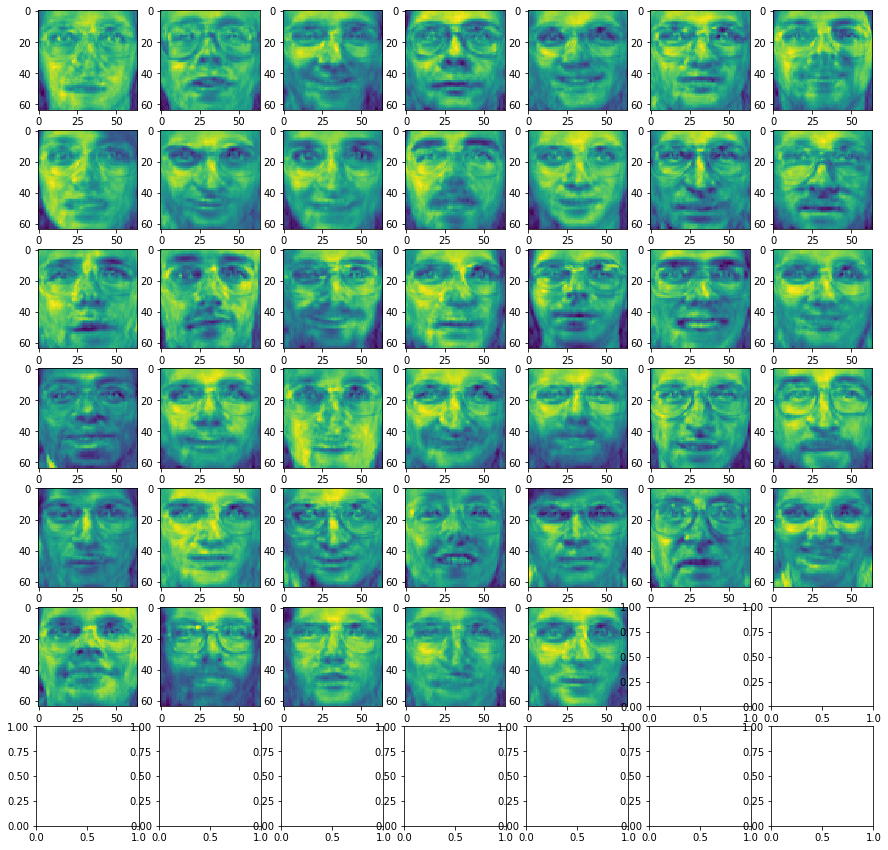

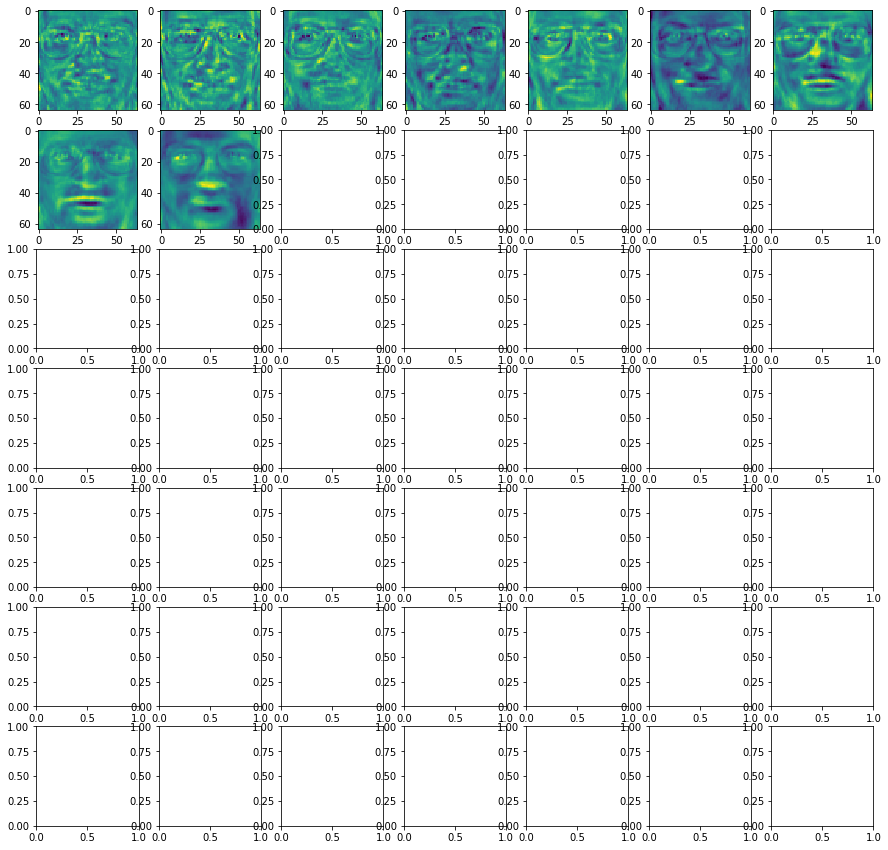

In [201]:
start_index = 4000
data.shape, eig[:, start_index:].shape
data_proj = data.dot(eig[:, start_index:])
print(data_proj.shape)
plot(data_proj.dot(eig[:, start_index:].T))
plot(eig[:, start_index:].T)

In [ ]:
# Plotting Eigen Vectors.